

# Maze Solution Algorithms

In [ ]:
from PIL import Image
import numpy as np

def process_maze_to_binary(image_path, grid_size):
    """Convert the maze image into a binary matrix of the given grid size."""
    img = Image.open("0.png").convert('L')  # Convert to grayscale
    img_resized = img.resize((grid_size, grid_size), Image.Resampling.LANCZOS)  # Resize to grid size
    matrix = np.array(img_resized)
    threshold = 128  # Adjust threshold for binary conversion
    binary_maze = (matrix < threshold).astype(int)  # Convert to binary: 1 = wall, 0 = path
    return binary_maze

# Example usage
binary_maze = process_maze_to_binary("image.png", grid_size=21)

In [ ]:
def print_aligned_maze(matrix):
    """Print the binary maze with proper alignment."""
    for row in matrix:
        print(" ".join(f"{cell}" for cell in row))

# Example usage
print_aligned_maze(binary_maze)


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1
1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1
1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1
1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1
1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1
1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1
1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1
1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1
1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1
1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1
1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1
1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1
1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [ ]:
from rich.console import Console

def print_binary_maze_rich(matrix):
    """Print the binary maze using the rich library for better alignment."""
    console = Console()
    for row in matrix:
        console.print(" ".join(str(cell) for cell in row))  # No need for "monospace" style

# Example usage
print_binary_maze_rich(binary_maze)


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1

1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1

1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1

1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1

1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1

1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1

1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1

1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1

1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1

1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1

1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1

1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1

1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1

1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1

1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1

1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1

1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1

1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1

1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

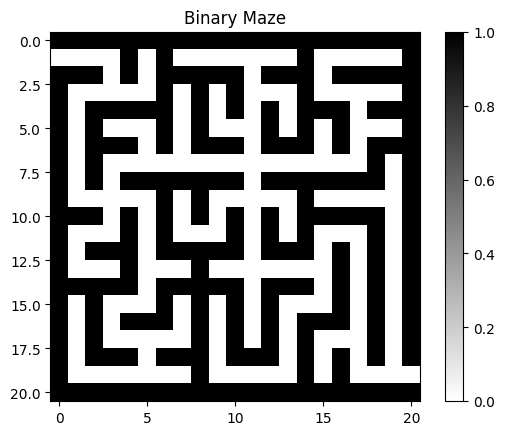

In [ ]:
import matplotlib.pyplot as plt

def visualize_binary_maze(matrix):
    """Visualize the binary maze matrix."""
    plt.imshow(matrix, cmap="binary")  # Use binary colormap for clarity
    plt.title("Binary Maze")
    plt.colorbar()
    plt.show()

# Example usage
visualize_binary_maze(binary_maze)
